# B spline
## B spline curve
$$
S(t) = \sum_{i=0}^n{N_{i,p}(t)P_i}
$$

Basic function
$$
N_{i,0}(u) = \left\{ \begin{array}{ll}
    1 & (u_i \leq u < u_{i+1}) \\
    0 & (otherwise)
  \end{array} \right.
$$

$$
N_{i,p}(u) = \frac{u-u_i}{u_{i+p}-u_i}N_{i, p-1}(u) + \frac{u_{i+p+1}-u}{u_{i+p+1}-u_{i+1}}N_{i+1,p-1}(u)
$$


In [59]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

In [60]:
def open_uniform_vector(m, n):
    u = np.zeros((m, 1), dtype=float)
    j = 1
    for i in range(m):
        if i <= n: 
            u[i] = 0.0
        elif i < m - (n+1): 
            u[i] = 1.0 / (m - 2*(n+1) + 1) * j
            j += 1
        else: 
            u[i] = 1.0 
    return u.flatten()

In [61]:
def basic_function(u, j, k, t):   
    w1 = 0.0
    w2 = 0.0
    if k == 0: 
        if u[j] < t <= u[j+1]:
            var = 1.0
        else:
            var = 0.0;
    else:
        if (u[j+k+1]-u[j+1]) != 0:
            w1 = basis_function(u, j+1, k-1, t) * (u[j+k+1] - t) / (u[j+k+1] - u[j+1])
        if (u[j+k]-u[j]) != 0:  
            w2 = basis_function(u, j, k-1, t)   * (t - u[j])     / (u[j+k] - u[j])        
        var = w1 + w2
    return var

<IPython.core.display.Javascript object>


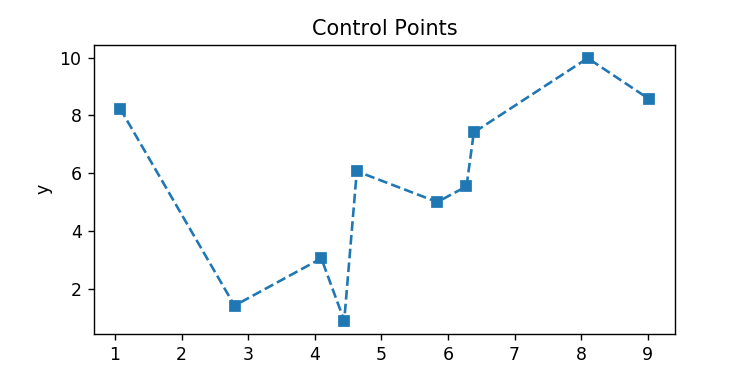

Text(0.5,1,'Control Points')

In [99]:
x = sorted([e for e in np.random.rand(10)*10])
y = [e for e in np.random.rand(10)*10]
P = np.array([x,y])
p = P.shape[1]
n = 2
m = p + n + 1
fig = plt.figure("Control Points", figsize = (6, 3))
plt.plot(P[0, :], P[1, :], "--s")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Control Points")

<IPython.core.display.Javascript object>


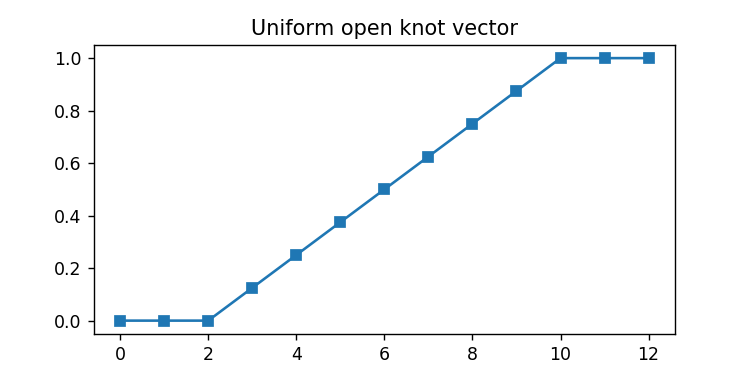

In [67]:
u = open_uniform_vector(m, n)
t = np.linspace(0.0, u[-1], int(u[-1]/0.01))
fig = plt.figure("knot vector", figsize=(6,3))
plt.title("Uniform open knot vector")
plt.plot(u, "-s")

In [101]:
S = np.zeros((2, len(t)))
S[:, 0] = P[:, 0]
for i in range(len(t)):
    if i==0:
        continue
        
    for j in range(p):
        b = basic_function(u, j, n, t[i] )  
        S[:, i] = S[:, i] + P[:, j]*b

<IPython.core.display.Javascript object>


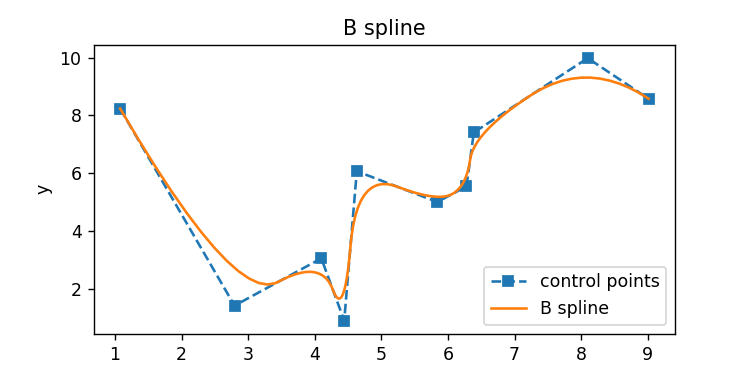

Text(0,0.5,'y')

In [102]:
fig = plt.figure("B-spline curve", figsize = (6, 3))
plt.plot(P[0, :], P[1, :], "--s", label="control points")
plt.plot(S[0, :], S[1, :], "-", label="B spline")
plt.legend()
plt.title("B spline")
plt.xlabel("x")
plt.ylabel("y")

<IPython.core.display.Javascript object>


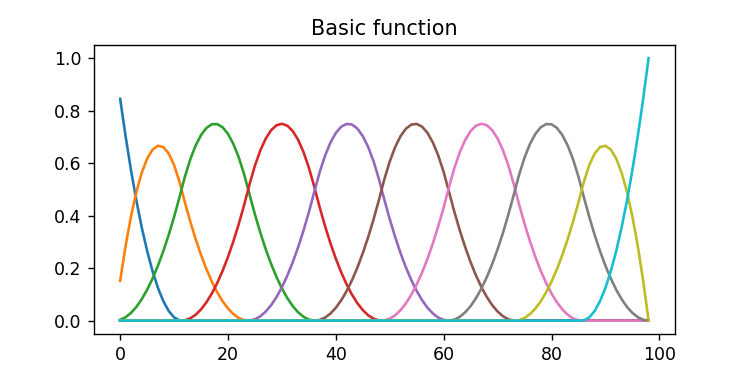

Text(0.5,1,'Basic function')

In [50]:
fig = plt.figure("Basic function", figsize = (6, 3))
for j in range(p):
    b = []
    for i in range(len(t)):
        if i==0:
            continue
        b.append(basic_function(u, j, n, t[i]))
    plt.plot(b)
plt.xlabel("p")
plt.title("Basic function")

## B spline surface
$$
S(u, v) = \sum_{i=0}^n\sum_{j=0}^m{N_{i,p}(u) N_{j,q}(v)P_{i,j}}
$$

In [53]:
mu = 5 # cols
mv = 4 # rows
Pu = sorted(np.random.rand(mu)*10)
Pv = sorted(np.random.rand(mv)*10)
p = 2 # degree of u
q = 2 # degree of q

pu, pv = np.meshgrid(Pu, Pv)
pz = np.sin(pu) + np.cos(pv)

for j in range(len(pu)):
    for i in range(len(pu[j])):
        pu[j][i] = pu[j][i] + np.random.normal(0, 0.1)
    
for j in range(len(pv)):
    for i in range(len(pv[j])):
        pv[j][i] = pv[j][i] + np.random.normal(0, 0.1)
             
# Control net
Puv = np.array([
    pu.flatten(),
    pv.flatten(),
    pz.flatten()
])

<IPython.core.display.Javascript object>


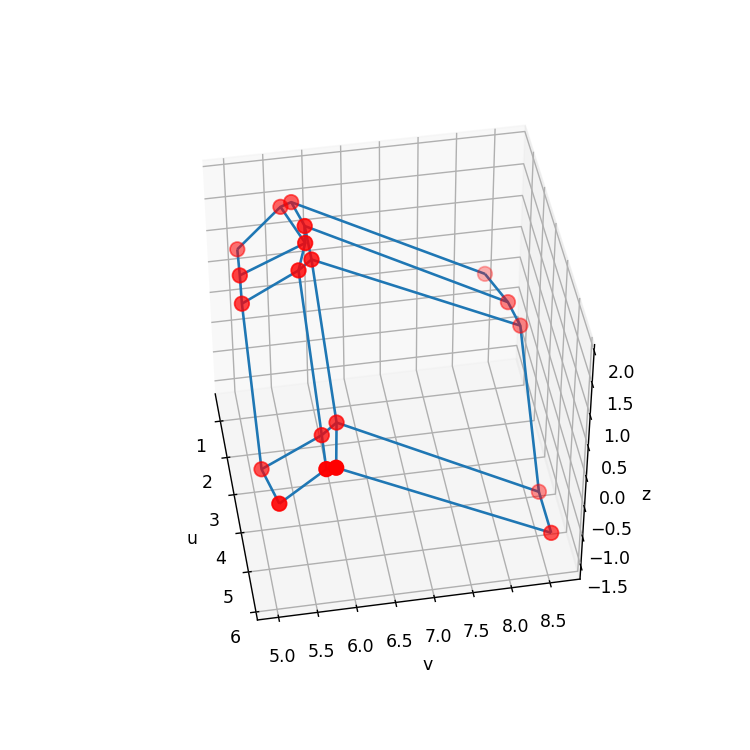

Text(0.5,0.92,'')

In [54]:
%matplotlib notebook
fig = plt.figure("Control points 3D", figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(pu,pv,pz)
ax.scatter3D(pu,pv,pz, c="red", s=70) 
ax.set_xlabel("u")
ax.set_ylabel("v")
ax.set_zlabel("z")
ax.set_title("")

<IPython.core.display.Javascript object>


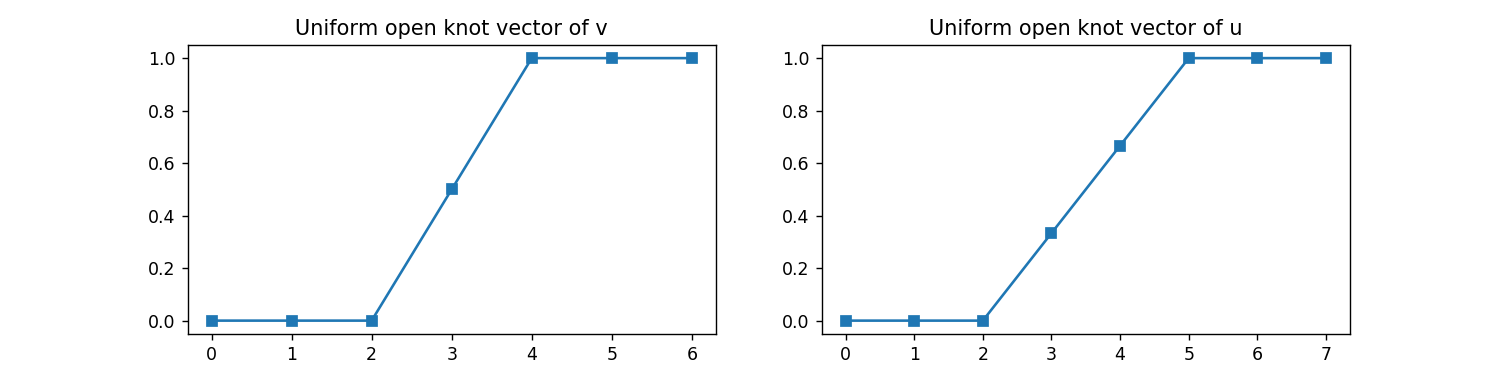

In [55]:
v = open_uniform_vector(mv + q + 1, q)
u = open_uniform_vector(mu + p + 1, p)
plt.figure("knot vector", figsize=(12,3))
plt.subplot(121)
plt.title("Uniform open knot vector of v")
plt.plot(v, "-s")
plt.subplot(122)
plt.title("Uniform open knot vector of u")
plt.plot(u, "-s")

In [56]:
tx = np.linspace(0.0, u[-1], int(u[-1]/0.05))  
ty = np.linspace(0.0, v[-1], int(v[-1]/0.05))  
mx, my = np.meshgrid(tx, ty)
mx = mx.flatten()
my = my.flatten()
S = np.array([
    mx, 
    my,
    np.zeros(len(mx))
])

In [57]:
ind = 0
for s in S.T:      
    val = 0    
    uv_ind = 0
    for j in range(mv): # u-control point
        for i in range(mu): # v-control point
            bu = basic_function(u, i, p, s[0] )
            bv = basic_function(v, j, q, s[1] )
            val += bu * bv * Puv[:, uv_ind]
            uv_ind += 1
    if val.sum() == 0:
        S[:, ind] = None   # TODO: uとvの最初でvalが0となる。1次元のときは制御点を代入していたが、簡単のため除外 
    else:
        S[:, ind] = val
    ind += 1

<IPython.core.display.Javascript object>


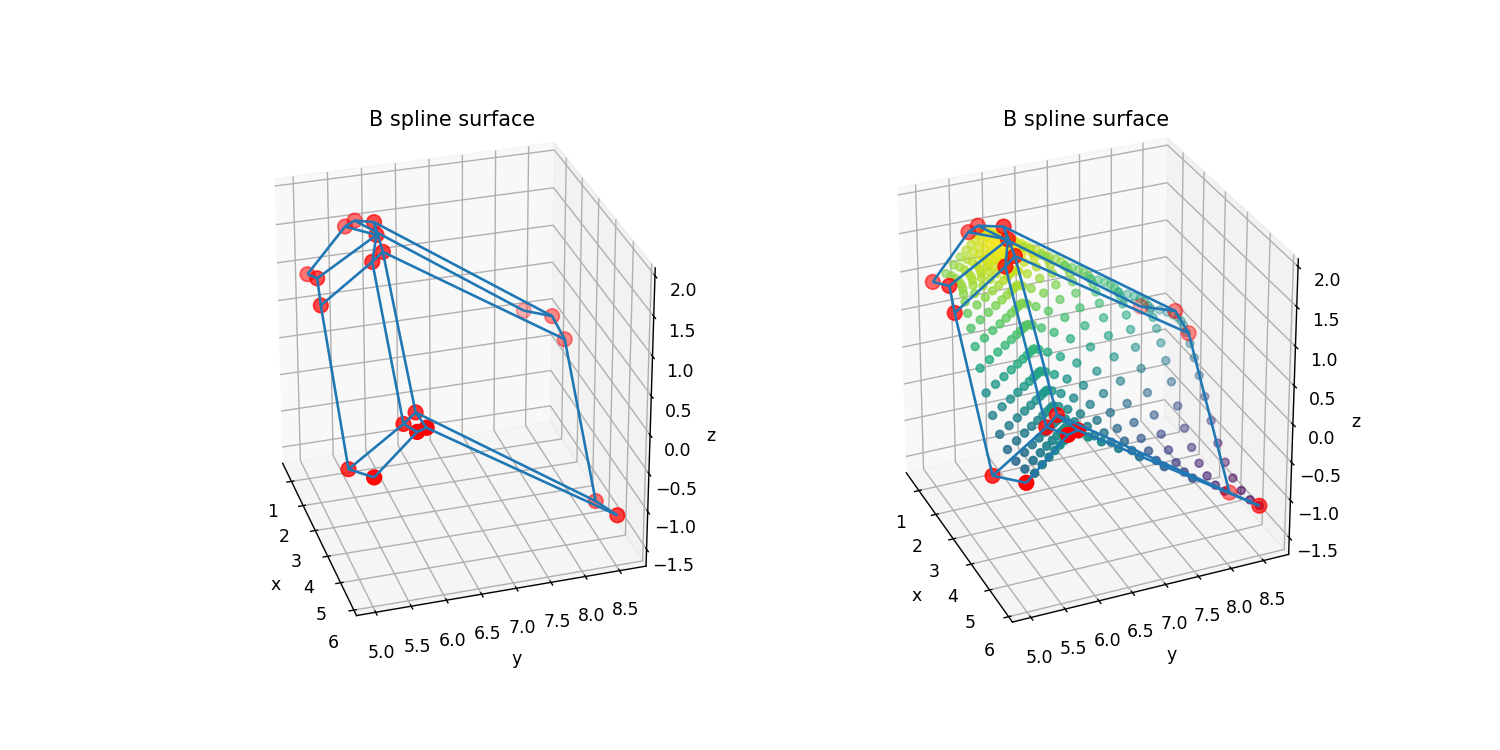

Text(0.5,0.92,'B spline surface')

In [58]:
fig = plt.figure("B-spline 2D", figsize=(12,6))
ax = fig.add_subplot(121, projection='3d')
ax.scatter3D(Puv[0,:], Puv[1,:], Puv[2,:], c = "red", s=70)
ax.plot_wireframe(pu,pv,pz)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title("B spline surface")

ax = fig.add_subplot(122, projection='3d')
ax.scatter3D(Puv[0,:], Puv[1,:], Puv[2,:], c = "red", s=70)
ax.plot_wireframe(pu,pv,pz)
ax.scatter3D(S[0,:], S[1,:], S[2,:], c=S[2,:])
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title("B spline surface")